https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

^^ fine-tuning the model -- important!

In [1]:
import os
import time
import pickle
import numpy as np

In [31]:
allimgs = '/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/all_images/'
imgpath = '/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1/255,
#                                   rotation_range=40,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1/255)

In [19]:
train_data_dir = imgpath+'train/'
validation_data_dir = imgpath+'validation/'
batch_size = 4 # keep small unless I add to my datasets
imgw, imgh = 150, 150

In [16]:
train_gen = train_datagen.flow_from_directory(
    imgpath+'train/',
    target_size=(imgw, imgh),
    batch_size=batch_size,
    class_mode='binary',
    seed=7)

validation_gen = test_datagen.flow_from_directory(
    imgpath+'validation/',
    target_size=(imgw, imgh),
    batch_size=batch_size,
    class_mode='binary',
    seed=13)

Found 331 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [15]:
nb_train_samples = train_gen.n
nb_validation_samples = validation_gen.n
epochs = 15

## Training a CNN

Build the model

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

In [17]:
# dimensions of our images.
img_width, img_height = 150, 150

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape)) # 1
model.add(Activation('relu')) # 2
model.add(MaxPooling2D(pool_size=(2, 2))) # 3

model.add(Conv2D(32, (3, 3))) # 4
model.add(Activation('relu')) # 5
model.add(MaxPooling2D(pool_size=(2, 2))) # 6

model.add(Conv2D(64, (3, 3))) # 7
model.add(Activation('relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #9 

model.add(Flatten()) # 10
model.add(Dense(64)) # 11
model.add(Activation('relu')) # 12
model.add(Dropout(0.5)) # 13 
model.add(Dense(1)) # 14
model.add(Activation('sigmoid')) # 15

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.fit_generator(
    train_gen,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_gen,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('./weights.h5')
model.save('./model.h5')

Epoch 1/15
82/82 [==============================] - 8s 101ms/step - loss: 0.7675 - acc: 0.5122 - val_loss: 0.6988 - val_acc: 0.5000
Epoch 2/15
82/82 [==============================] - 7s 87ms/step - loss: 0.7098 - acc: 0.5112 - val_loss: 0.6787 - val_acc: 0.6500
Epoch 3/15
82/82 [==============================] - 7s 88ms/step - loss: 0.7058 - acc: 0.5102 - val_loss: 0.6775 - val_acc: 0.7500
Epoch 4/15
82/82 [==============================] - 7s 88ms/step - loss: 0.6979 - acc: 0.5569 - val_loss: 0.6773 - val_acc: 0.6000
Epoch 5/15
82/82 [==============================] - 7s 90ms/step - loss: 0.6889 - acc: 0.5315 - val_loss: 0.6862 - val_acc: 0.5500
Epoch 6/15
82/82 [==============================] - 7s 86ms/step - loss: 0.6794 - acc: 0.5417 - val_loss: 0.6646 - val_acc: 0.6000
Epoch 7/15
82/82 [==============================] - 7s 90ms/step - loss: 0.6648 - acc: 0.5945 - val_loss: 0.6908 - val_acc: 0.5500
Epoch 8/15
82/82 [==============================] - 7s 87ms/step - loss: 0.6653 - 

On understanding those values: https://stackoverflow.com/questions/47299624/how-to-understand-loss-acc-val-loss-val-acc-in-keras-model-fitting/47303461

### Classify the image

In [23]:
import h5py
import os

In [22]:
imgfiles = os.listdir(imgpath+'test2/')

In [25]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

img = image.load_img(imgpath+'test2/'+imgfiles[10], target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [26]:
featurestest = model.predict(x)

In [ ]:
#model.layers

### Try to extract intermediate features:

In [27]:
from tensorflow.keras import backend as K

# with a Sequential model
get_11th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[11].output])
featuresize = np.shape(get_11th_layer_output([x])[0])
#print(get_11th_layer_output([x]))
#layer_output = get_14th_layer_output([x])[0]

[array([[  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      , 339.836   ,   0.      , 185.93387 ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         21.659122,   0.      ,   0.      ,   0.      ,   0.      ,
        818.9184  ,   0.      ,   0.      , 252.44403 ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      , 305.41107 ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
        468.26428 ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ]], dtype=float32)]


### Calculate features for every image in train & validation datasets

In [28]:
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [40]:
filenames = [imgpath+"all/necklaces/"+f for f in os.listdir(imgpath+"/all/necklaces/")]
filenames[0:4]

['/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771862647.jpg',
 '/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771849603.jpg',
 '/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771860291.jpg',
 '/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771852141.jpg']

In [41]:
feature_dict = {f: get_11th_layer_output([preprocess_img(f)])[0].flatten() for f in filenames}

In [43]:
pickle.dump(feature_dict, open("./11th_layer_feature_all_necklaces.p", "wb"))

### Use Locality Sensitive Hashing to find similar images

In [44]:
from lshash_2 import LSHash
from tqdm import notebook
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
## Locality Sensitive Hashing
# params
k = 10 # hash size
L = 10  # number of tables
d = featuresize[1] # Dimension of Feature vector
lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)

# LSH on all the images
for img_path, vec in notebook.tqdm(feature_dict.items()):
    lsh.index(vec, extra_data=img_path)

# Exporting as pickle
pickle.dump(lsh, open('./lsh.p', "wb"))

In [2]:
# Loading Feature dictionary & associated hashing
feature_dict = pickle.load(open('./11th_layer_feature_dict.p','rb'))
lsh = pickle.load(open('./lsh.p','rb'))

In [31]:
def get_similar_item(idx, feature_dict, lsh_variable, n_items=5):
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='cosine')    
    return response

In [32]:
responsetest = get_similar_item(23, feature_dict, lsh,5)

In [33]:
#responsetest[2:5][0][0]

/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771854709.jpg
/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771854973.jpg
/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771864439.jpg
/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771866619.jpg
/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771862669.jpg
/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/necklace_or_not_necklace/all/necklaces/771850887.jpg


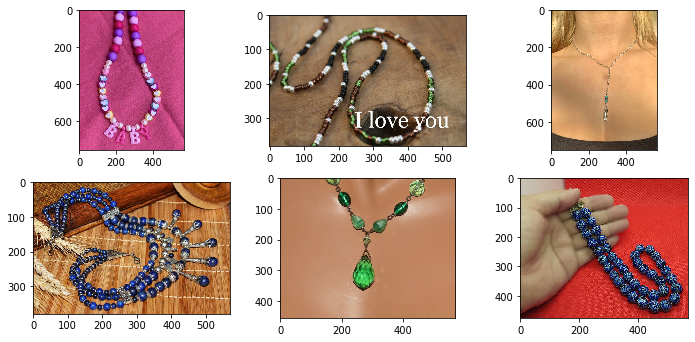

In [39]:
columns = 3
n_items=5
response = responsetest
rows = int(np.ceil(n_items+1/columns))
fig=plt.figure(figsize=(2*rows, 3*rows))
for i in range(1, columns*rows +1):
    if i<n_items+2:
        print(response[i-1][0][1])
        img = Image.open(response[i-1][0][1])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
plt.show()

In [ ]:
responsetest